In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
dfh = pd.read_csv(r"C:\Users\Saniya Mirza\Downloads\heart.csv")

In [6]:
dfh

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
dfh.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
dfh.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

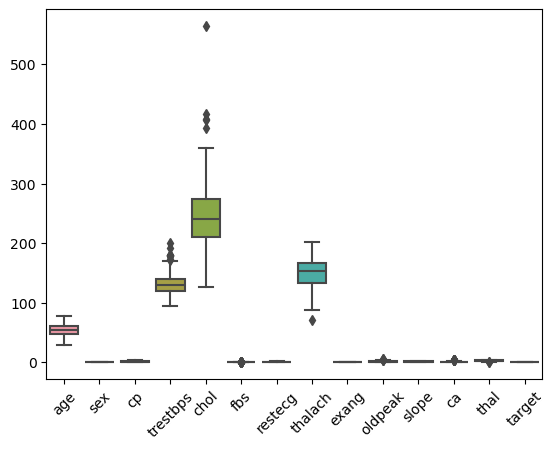

In [9]:
sns.boxplot(dfh)
plt.xticks(rotation = 45)
plt.show()

In [10]:
dfh.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
cols = ['trestbps', 'chol', 'fbs','thalach',
       'oldpeak','ca', 'thal']

In [12]:
cols

['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

In [13]:
import time

In [14]:
for c in cols :
    print(c)
    time.sleep(0.2)

trestbps
chol
fbs
thalach
oldpeak
ca
thal


In [15]:
for c in cols :
    print(dfh[c])
    time.sleep(0.5)

0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trestbps, Length: 303, dtype: int64
0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 303, dtype: int64
0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64
0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64
0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302    0.0
Name: oldpeak, Length: 303, dtype: float64
0      0
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    2
301    1
302    1
Name: ca, Length: 303, dtype: int64
0      1
1      2
2      2
3      2
4      2
      ..
298    3
299    3
300    3


In [16]:
for c in cols :
    sk = dfh[c].skew().round()
    if sk == 0 or sk == -0:
        print("Normal Distibution")
    else:
        print("Skewed Distibution")

    print(c, end = "==>")
    print(sk)
    time.sleep(0.5)

Skewed Distibution
trestbps==>1.0
Skewed Distibution
chol==>1.0
Skewed Distibution
fbs==>2.0
Skewed Distibution
thalach==>-1.0
Skewed Distibution
oldpeak==>1.0
Skewed Distibution
ca==>1.0
Normal Distibution
thal==>-0.0


In [17]:
for c in cols :
    sk = dfh[c].skew().round()
    if sk == 0 or sk == -0:
        m = dfh[c].mean()
        s = dfh[c].std()
        lowerlimit = m - 3 * s
        upperlimit = m + 3 * s
        dfh[c] = dfh[c].map(lambda x : lower if x < lowerlimit else upper if x > upperlimit else x )
    else:
        q1 = dfh[c].quantile(0.25)
        q3 = dfh[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - (1.5*iqr)
        upper = q3 + (1.5*iqr)
        dfh[c] = dfh[c].map(lambda x : lower if x < lower else upper if x > upper else x)
    time.sleep(0.5)

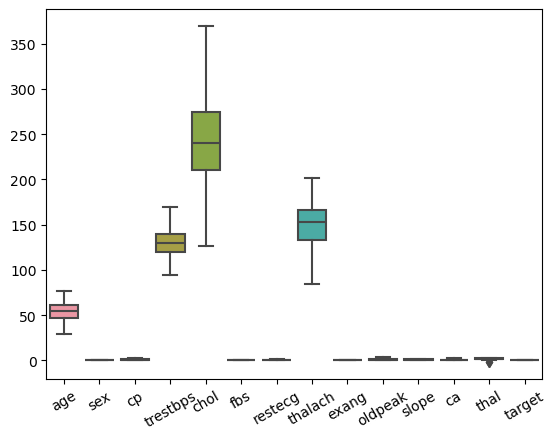

In [24]:
sns.boxplot(dfh)
plt.xticks(rotation = 30)
plt.show()